In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)

articles = pd.read_csv("/content/drive/MyDrive/HM-Recommender-System-App/Data/articles.csv")
articles.sample(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
41878,670538007,670538,World Cup SS Tee,255,T-shirt,Garment Upper body,1010014,Placement print,42,Red,5,Bright,18,Red,5950,On Demand,F,Menswear,3,Menswear,55,Contemporary Street,1005,Jersey Fancy,T-shirt in printed cotton jersey.
5312,493836027,493836,TP ALBIN basic rib l/s 2p SB,252,Sweater,Garment Upper body,1010012,Mixed solid/pattern,73,Dark Blue,4,Dark,2,Blue,7668,Kids Boy Jersey Basic,H,Children Sizes 92-140,4,Baby/Children,72,Boys Underwear & Basics,1002,Jersey Basic,Long-sleeved tops in organic cotton jersey.
27529,620208053,620208,NIKE legging,273,Leggings/Tights,Garment Lower body,1010001,All over pattern,8,Dark Grey,4,Dark,12,Grey,7920,Kids Girl Jersey Basic,H,Children Sizes 92-140,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,"Leggings in heavy, organic cotton jersey with ..."


In [ ]:
articles.shape

(105542, 25)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)

customers = pd.read_csv("/content/drive/MyDrive/HM-Recommender-System-App/Data/customers.csv")
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [ ]:
customers.shape

(1371980, 7)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 50)

transactions = pd.read_csv("/content/drive/MyDrive/HM-Recommender-System-App/Data/transactions_train.csv")
transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2


In [ ]:
transactions.shape

(31788324, 5)

# Articles

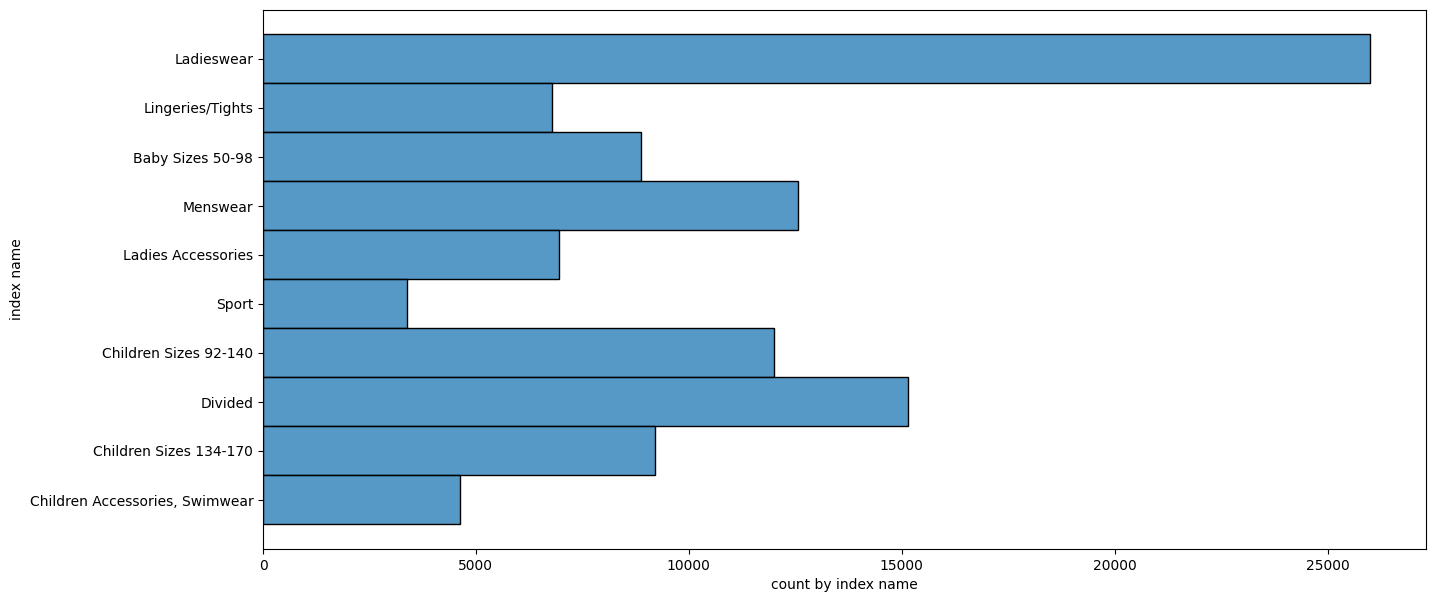

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion. So now, lets look at the Garment Group names and stack it with the index group name.

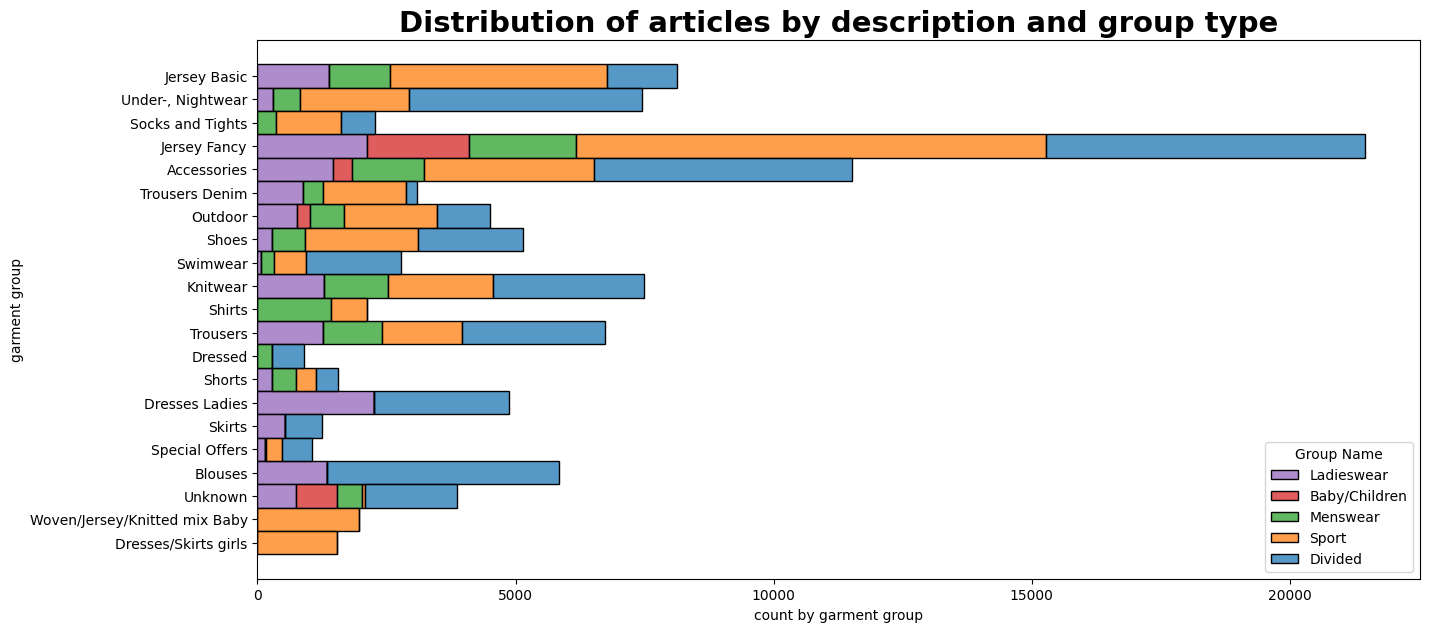

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', hue='index_group_name', multiple="stack", )
plt.title("Distribution of articles by description and group type", fontsize=21, fontweight='bold')
plt.legend(title='Group Name', labels=['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'])
ax.set_xlabel('Count by garment group')
ax.set_ylabel('Garment group');

The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next by number is accessories.


Now, let's pay attention to index group-index structure. Ladieswear and Children/Baby have subgroups.

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

And look at the product group-product structure. Accessories are really various, the most numerous: bags, earrings and hats.

In [ ]:
import pandas as pd
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox                        15
                       Gloves                        367
                       Hair clip                     244
                       Hair string                   238
                       Hair ties                      24
                       Hair/alice band               854
                       Hairband                        2
                       Hat/beanie                   1349
                       Hat/brim                      396
                       Headband                        1
                       Necklace                      581
                       Other accessories            1034
                       Ring                          240
                       Scarf                        1013
                       Soft Toys                      46
                       Straw hat                       6
                       Sunglasses                    621
                       Tie                           141
                       Umbrella                       26
                       Wallet                         77
                       Watch                          73
                       Waterbottle                    22
Bags                   Backpack                        6
                       Bumbag                          1
                       Cross-body bag                  5
                       Shoulder bag                    2
                       Tote bag                        2
                       Weekend/Gym bag                 9
Cosmetic               Chem. cosmetics                 3
                       Fine cosmetics                 46
Fun                    Toy                             2
Furniture              Side table                     13
Garment Full body      Costumes                       90
                       Dress                       10362
                       Dungarees                     309
                       Garment Set                  1320
                       Jumpsuit/Playsuit            1147
                       Outdoor overall                64
Garment Lower body     Leggings/Tights              1878
                       Outdoor trousers              130
                       Shorts                       3939
                       Skirt                        2696
                       Trousers                    11169
Garment Upper body     Blazer                       1110
                       Blouse                       3979
                       Bodysuit                      913
                       Cardigan                     1550
                       Coat                          460
                       Hoodie                       2356
                       Jacket                       3940
                       Outdoor Waistcoat             154
                       Polo shirt                    449
                       Shirt                        3405
                   

Finally, let's look at the table with number of unique values in columns:

In [ ]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'No. of unique {col}: {un_n}')

No. of unique prod_name: 45875
No. of unique product_type_name: 131
No. of unique product_group_name: 19
No. of unique graphical_appearance_name: 30
No. of unique colour_group_name: 50
No. of unique perceived_colour_value_name: 8
No. of unique perceived_colour_master_name: 20
No. of unique department_name: 250
No. of unique index_name: 10
No. of unique index_group_name: 5
No. of unique section_name: 56
No. of unique garment_group_name: 21
No. of unique detail_desc: 43404


# Customers

In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


Grouping customers by the `postal_code`

In [ ]:
data_postal = customers.groupby('postal_code', as_index=False).count()\
                              .sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


One postal code has `120303` customers. This is abnormal and we assume that this postal code is encoded for Null addresses or a distribution center or a pick up location.

Now we check for the `club_member_status` and `age`.

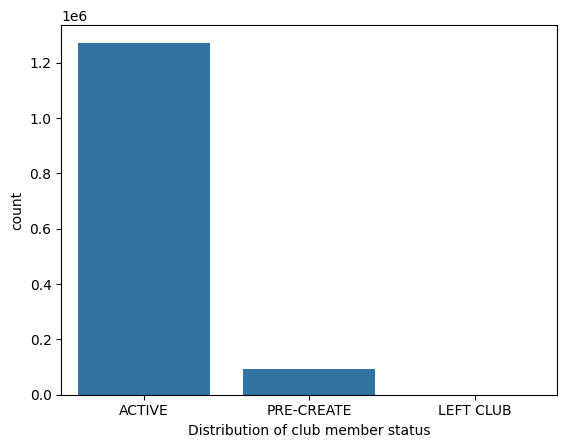

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.countplot(data=customers, x='club_member_status')
plt.xlabel('Distribution of club member status')
plt.show()

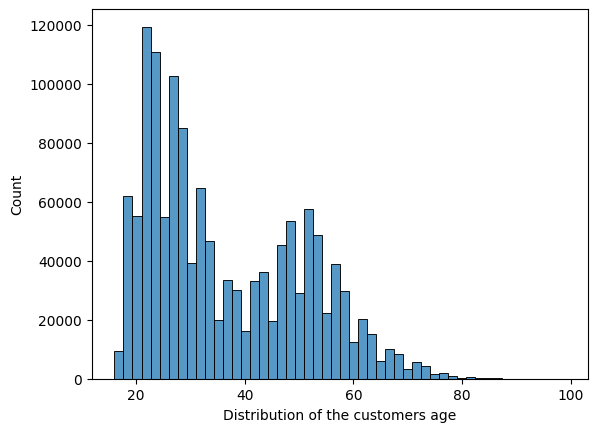

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(data=customers, x='age', bins=50)
plt.xlabel('Distribution of the customers age')
plt.show()

We check the `fashion_news_frequency` column and see that there are three types of No Data so we change the values to a unique NONE.

In [ ]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly'], dtype=object)

In [ ]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

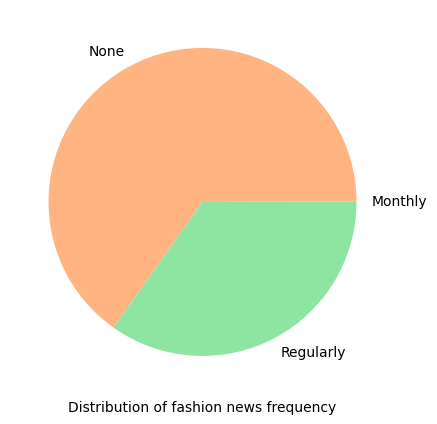

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

# Transactions

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


Checking outliers for price

In [ ]:
transactions.describe()['price']

,price
count,3.178832e+07
mean,2.782927e-02
std,1.918113e-02
min,1.694915e-05
25%,1.581356e-02
50%,2.540678e-02
75%,3.388136e-02
max,5.915254e-01


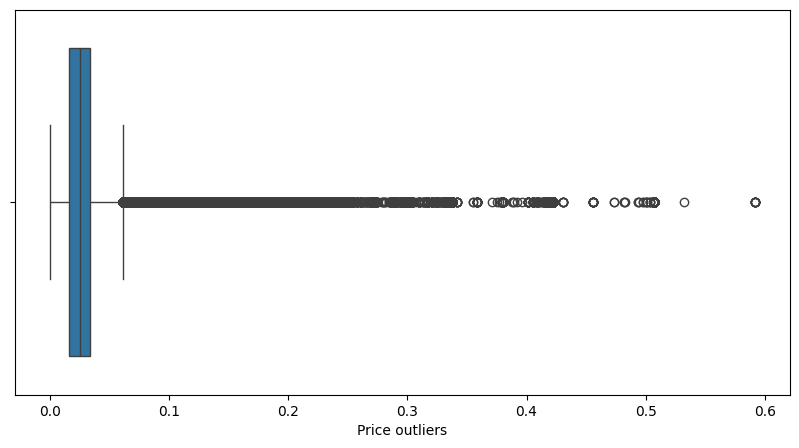

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price')
ax.set_xlabel('Price outliers')
plt.show()

Top 10 customers by no. of transactions

In [ ]:
transactions.groupby('customer_id').count()\
        .sort_values(by='price', ascending=False)['price'][:10]

,price
customer_id,
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b,1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71,1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f,1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc,1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6,1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d,1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa,1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076,1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296,1157


From our understanding from above, we want to compare the prices inside groups as prices of accessories and trousers may vary largely. For this, we get subset from articles df and merge it to transactions.

In [ ]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', \
                               'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']]\
                      .merge(articles_for_merge, on='article_id', how='left')

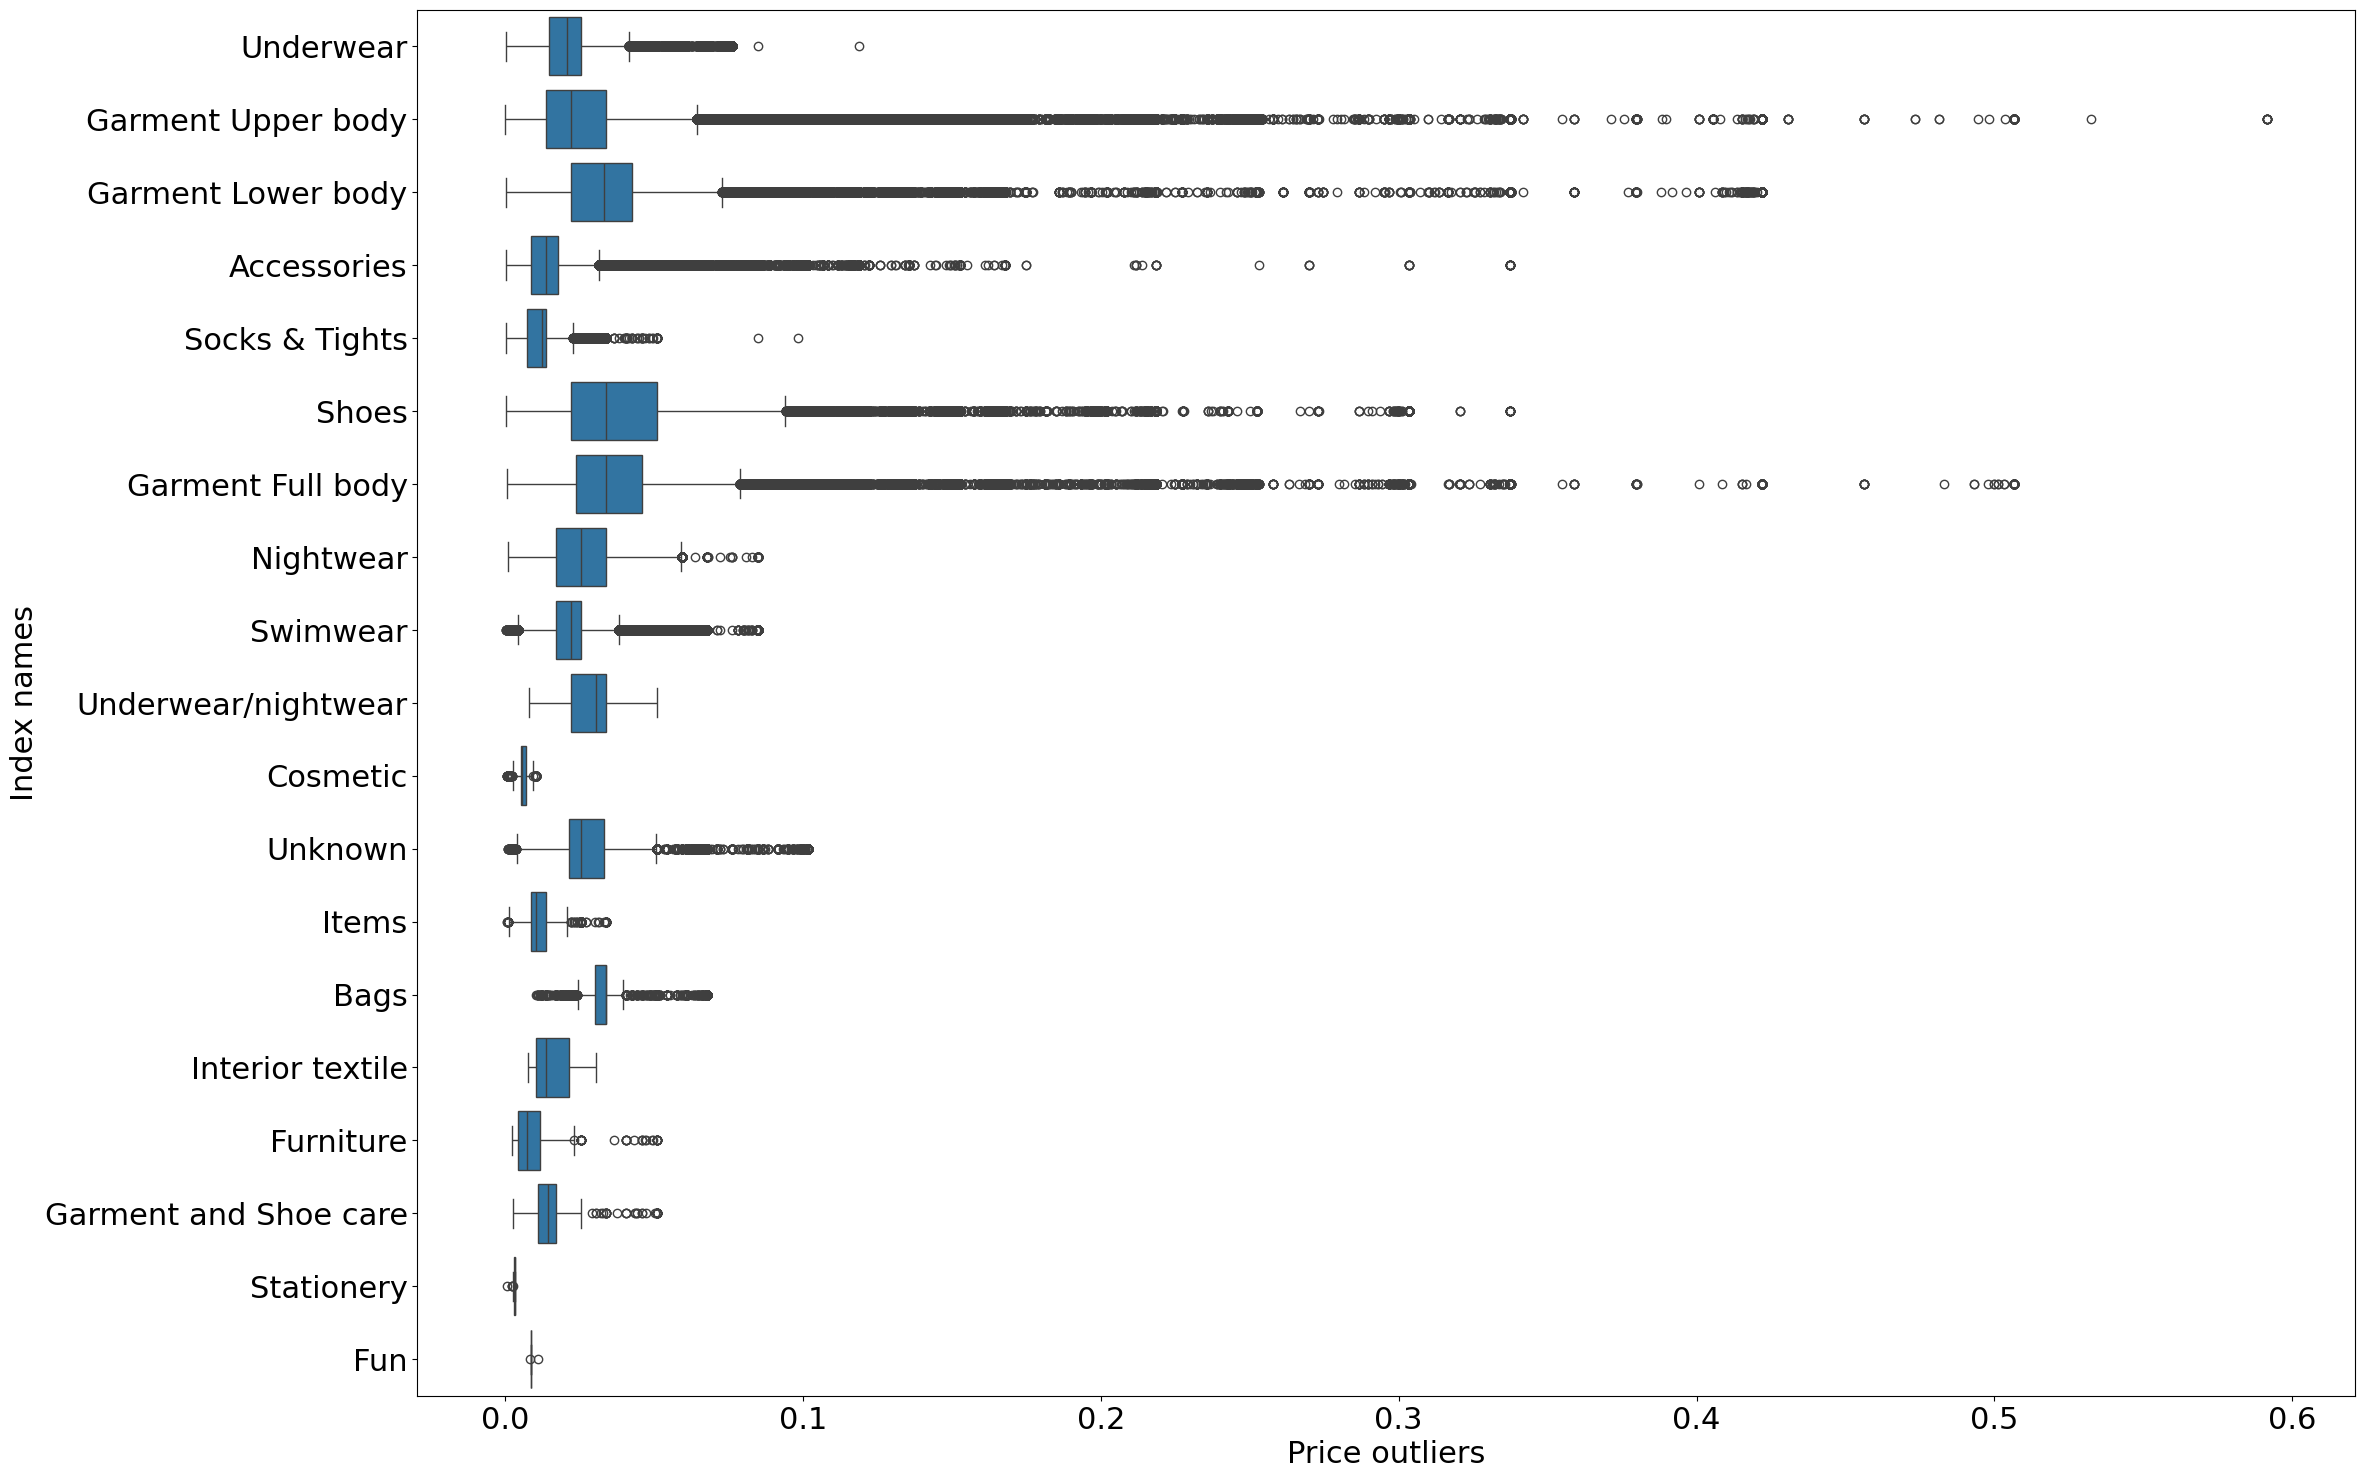

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

Here we see outliers for group name prices. Lower/Upper/Full body have a huge price variance. I guess it could be like some unique collections, relative to casual ones. Some high price articles even belong to accessories group.

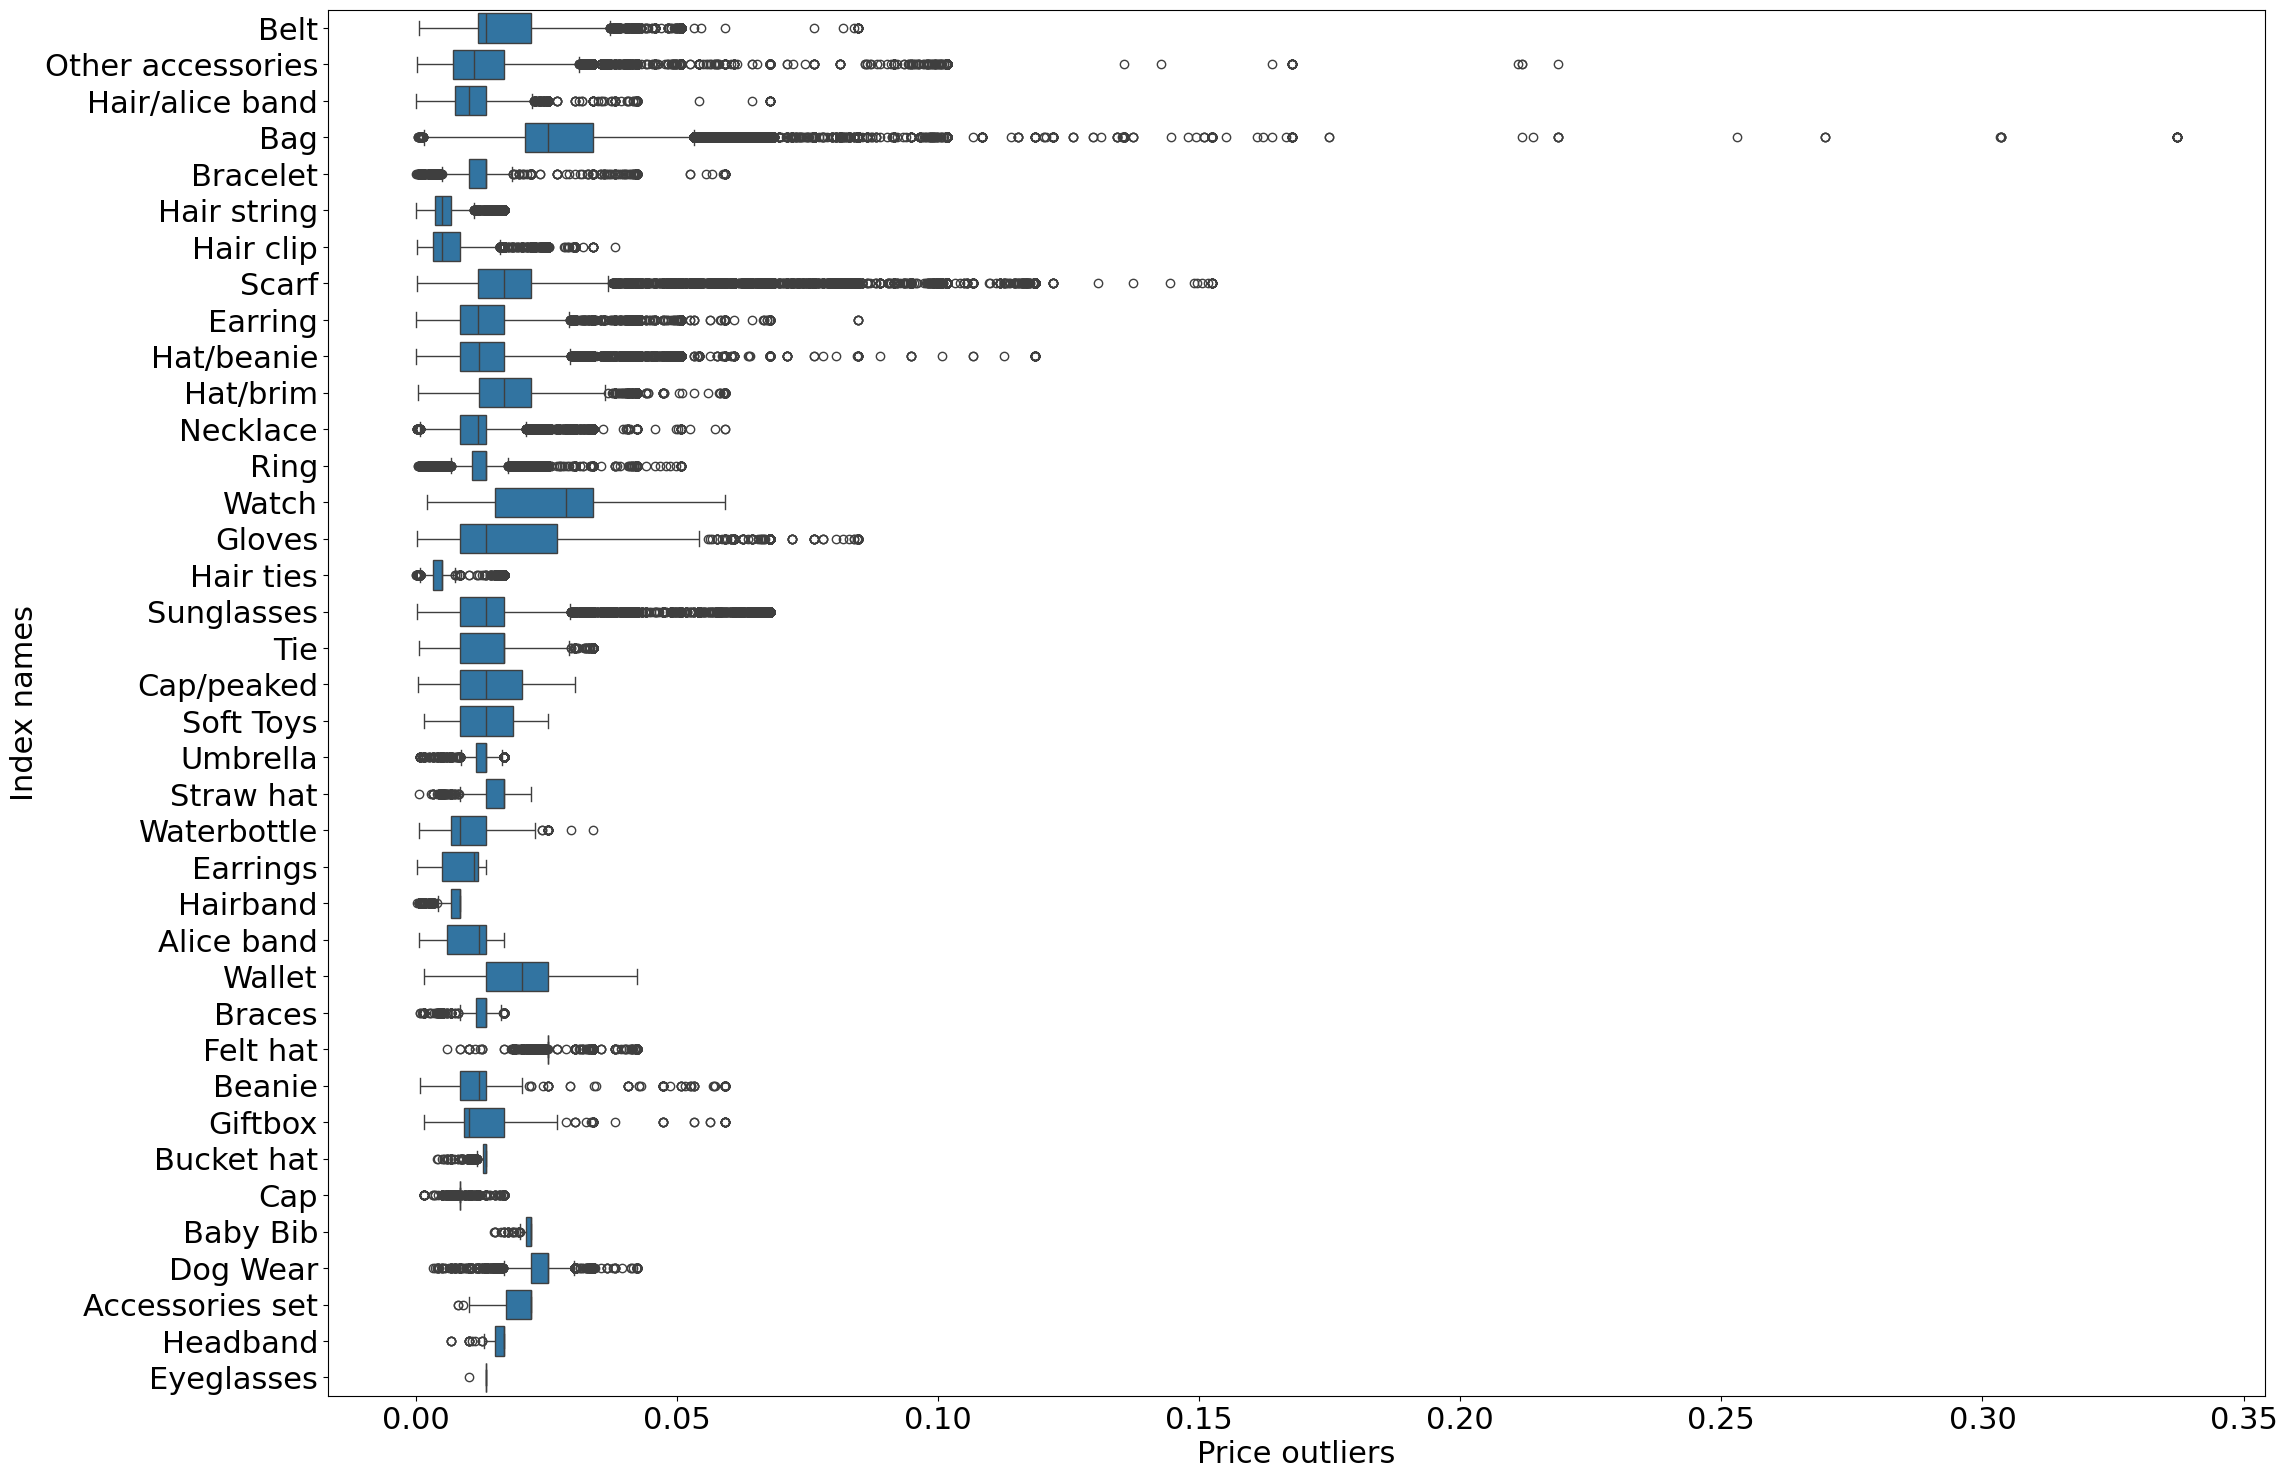

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside group.

The largest outliers can be found among bags, which is logical enough. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

The index with the highest mean price is Ladieswear. With the lowest - children.

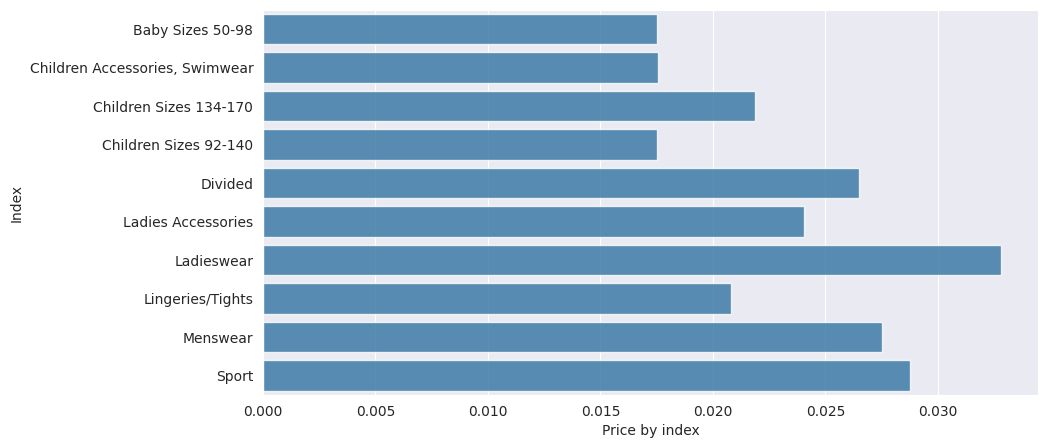

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

Stationery has the lowest mean price, the highest - shoes.


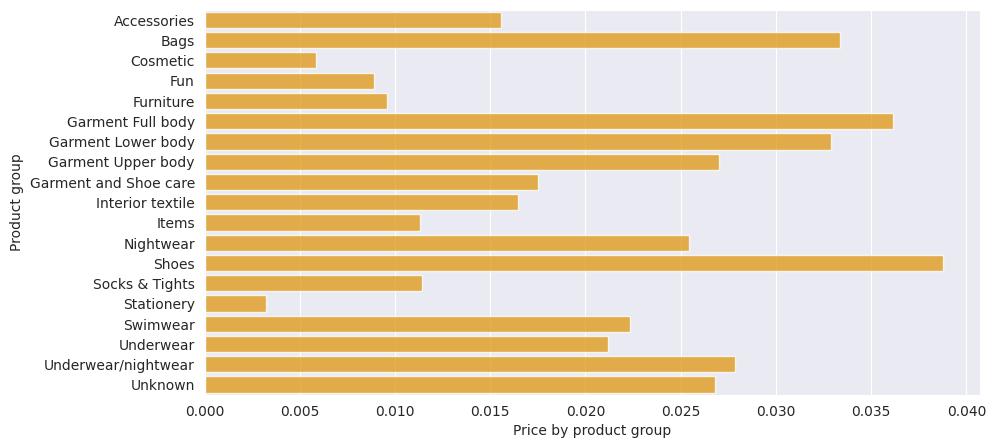

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

# Recommendation Systems

In [1]:
!pip install surprise --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Collaborative Filtering

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 50)

transactions = pd.read_csv("/content/drive/MyDrive/HM-Recommender-System-App/Data/out.csv")
transactions.sample(3)

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
133394,2020-09-14,b548d3e0580386a6345a162a2bc34b1a027d79dedcc72d...,822115004,0.025407,2,2020-09-14,2020-09-14,1
518828,2020-09-08,0828835616fff1676285e73b1873fad257d085141dc0fe...,762846031,0.025407,2,2020-09-08,2020-09-08,1
420399,2020-09-18,6993a9a33094fd40c590f89a29914b7b0585b1dd8e2ad8...,918522001,0.042356,2,2020-09-18,2020-09-18,1


In [ ]:
transactions.shape

(671674, 8)

Transactions data description:

- t_dat : A unique identifier of every customer
- customer_id : A unique identifier of every customer (in customers table)
- article_id : A unique identifier of every article (in articles table)
- price : Price of purchase
- sales_channel_id : 1 or 2

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader(rating_scale = (0,1))
customer_data = Dataset.load_from_df(transactions[['customer_id', 'article_id', 'bought']], reader)

In [ ]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(customer_data, test_size=0.2, random_state=42)

In [ ]:
print('Number of users: ', trainset.n_users)
print('Number of items: ', trainset.n_items)

Number of users:  172712
Number of items:  9225


### Baselines without cross validation

In [ ]:
from surprise import NormalPredictor, accuracy

baseline = NormalPredictor()
baseline.fit(trainset)

# Return test predictions for model fit on trainset
predictions = baseline.test(testset)

# Save RMSE score to variable
baseline_normal = accuracy.rmse(predictions)

RMSE: 0.0000


In [ ]:
from surprise import BaselineOnly

baseline2 = BaselineOnly()
baseline2.fit(trainset)

# Return test predictions for model fit on trainset
predictions = baseline2.test(testset)

# Save RMSE score to variable
baseline_only = accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.0000


### SVD

In [ ]:
from surprise import SVD

svd = SVD()
svd.fit(trainset)

# Return test predictions for model fit on trainset
predictions = svd.test(testset)

# Save RMSE score to variable
svd_rmse = accuracy.rmse(predictions)
svd_rmse

RMSE: 0.0462


0.04619731388268188

In [ ]:
cust_id='0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2'
svd.predict(cust_id, 902802002)

Prediction(uid='0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2', iid=902802002, r_ui=None, est=1, details={'was_impossible': False})

In [ ]:
transactions.loc[(transactions['customer_id'] == '0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2') &
                 (transactions['article_id'] == 902802002)]

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought


Hyperparameter tuining

In [ ]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[10,50],'n_epochs': [5, 15], 'lr_all': [0.002,0.01],
             'reg_all': [0.2,0.6]}
gs_model_SVD1 = GridSearchCV(SVD,param_grid=param_grid,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD1.fit(customer_data)

gs_model_SVD1.best_params

[Parallel(n_jobs=-2)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed:  6.7min


{'rmse': {'n_factors': 10, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.6}}

In [ ]:
param_grid2 = {'n_factors':[5,10],'n_epochs': [15, 50], 'lr_all': [0.001, 0.01],
             'reg_all': [0.6, 0.8]}
gs_model_SVD2 = GridSearchCV(SVD,param_grid=param_grid2,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD2.fit(customer_data)

gs_model_SVD2.best_params

[Parallel(n_jobs=-2)]: Done  17 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done  71 tasks      | elapsed: 13.3min


{'rmse': {'n_factors': 5, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.8}}

In [ ]:
param_grid3 = {'n_factors':[10],'n_epochs': [50, 100], 'lr_all': [0.1, 0.2],
             'reg_all': [0.8, 0.9]}
gs_model_SVD3 = GridSearchCV(SVD,param_grid=param_grid3,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD3.fit(customer_data)

gs_model_SVD3.best_params

[Parallel(n_jobs=-2)]: Done  17 tasks      | elapsed:  5.2min


{'rmse': {'n_factors': 10, 'n_epochs': 100, 'lr_all': 0.2, 'reg_all': 0.8}}

In [ ]:
param_grid4 = {'n_factors':[10],'n_epochs': [100, 150], 'lr_all': [0.2, 0.3],
             'reg_all': [0.7, 0.8]}
gs_model_SVD4 = GridSearchCV(SVD,param_grid=param_grid4,joblib_verbose=5, measures=['RMSE'], n_jobs=-2)
gs_model_SVD4.fit(customer_data)

gs_model_SVD4.best_params

Building SVD with best params

In [ ]:
svd_model2 = SVD(n_factors= 10, n_epochs= 50)
svd_model2.fit(trainset)
svd_predictions2 = svd_model2.test(testset)
svd_tuned_predictions = accuracy.rmse(svd_predictions2)
svd_tuned_predictions

RMSE: 0.0114


0.01144403915103213

# Recommendation System

In [ ]:
trainset_full = customer_data.build_full_trainset()
final_model = SVD(n_factors= 10, n_epochs= 50)
final_model.fit(trainset_full)

- Load the articles df here as meta data with article id as the index
- build function

In [4]:
# Load in the meta data for use in returning the details about the recommended articles
meta_articles = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/articles.csv',
                            index_col='article_id')
meta_articles.head(3)

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,,,,
108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
transactions.head()

,InvoiceDate,customer_id,article_id,price,sales_channel_id,t_dat,date,bought
0,2020-09-14,0008968c0d451dbc5a9968da03196fe20051965edde741...,893059004,0.035576,2,2020-09-14,2020-09-14,1
1,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,902802002,0.033881,2,2020-09-03,2020-09-03,1
2,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000007,0.050831,2,2020-09-03,2020-09-03,1
3,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,918292001,0.042356,2,2020-09-03,2020-09-03,1
4,2020-09-03,002611889659ab1051fc3e4e870f2b603c3aaa902ffe6a...,805000001,0.050831,2,2020-09-03,2020-09-03,1


In [ ]:
# The transactions data is subset to just show customers and the articles they have bought
df_customer = transactions.set_index('customer_id')
df_customer.drop(columns=['InvoiceDate', 'price', 'sales_channel_id', 't_dat', 'date', 'bought'], inplace=True)
df_customer.head()

,article_id
customer_id,
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,893059004
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,902802002
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000007
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,918292001
002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc,805000001


In [ ]:
# Getting input of customer ID and no. of recommendations to get
customer = input("Customer ID: ")
n_rec = int(input("Number of recommendations: "))

Customer ID: 002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc
Number of recommendations: 10


In [ ]:
# Creating a list of the items that said reviewer has already rated
have_bought = list(df_customer.loc[customer, 'article_id'])
have_bought

[902802002, 805000007, 918292001, 805000001, 730683050, 910824001]

In [ ]:
# Creating new dataframe from meta data to subset based on already bought articles
not_bought = meta_articles.copy()
# Dropping indexes (article_id) that correspond to already bought articles
not_bought.drop(have_bought, inplace=True)
# Reset index to pull out article_id as a seperate column
not_bought.reset_index(inplace=True)
not_bought.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
# Obtain rating predictions based on model.predict, passing in user input.
not_bought['est_purchase'] = not_bought['article_id'].apply(lambda x: final_model.predict(customer, x).est)

# Sort dataframe based on newly created est_purchase problem in order to return top estimated ratings (purcahse in this case)
not_bought.sort_values(by='est_purchase', ascending=False, inplace=True)
not_bought.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,est_purchase
45358,683001019,683001,Pattern 7p Socks,302,Socks,Socks & Tights,1010001,All over pattern,10,White,3,Light,9,White,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit socks in a soft cotton blend.,1.0
96014,868680002,868680,Tina creasing tank,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1643,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Fitted top in ribbed cotton jersey with narrow...,1.0
45178,682289012,682289,Porcupine fluid trench,262,Jacket,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,Knee-length trenchcoat in a woven modal blend ...,1.0
69685,757904007,757904,Maud Blanket,80,Scarf,Accessories,1010004,Check,11,Off White,1,Dusty Light,9,White,3409,Scarves,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Large scarf in a soft weave with short fringes...,1.0
96030,868751002,868751,OP Brazilian 4pk,286,Underwear bottom,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1336,Shopbasket Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Brazilian briefs in microfibre with laser-cut ...,1.0


In [ ]:
# Final step is to only return the top n_recs as denoted by input, done using .head(n_recs)
not_bought.head(n_rec)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,est_purchase
45358,683001019,683001,Pattern 7p Socks,302,Socks,Socks & Tights,1010001,All over pattern,10,White,3,Light,9,White,3611,Shopbasket Socks,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit socks in a soft cotton blend.,1.0
96014,868680002,868680,Tina creasing tank,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1643,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Fitted top in ribbed cotton jersey with narrow...,1.0
45178,682289012,682289,Porcupine fluid trench,262,Jacket,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,Knee-length trenchcoat in a woven modal blend ...,1.0
69685,757904007,757904,Maud Blanket,80,Scarf,Accessories,1010004,Check,11,Off White,1,Dusty Light,9,White,3409,Scarves,C,Ladies Accessories,1,Ladieswear,65,Womens Big accessories,1019,Accessories,Large scarf in a soft weave with short fringes...,1.0
96030,868751002,868751,OP Brazilian 4pk,286,Underwear bottom,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1336,Shopbasket Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Brazilian briefs in microfibre with laser-cut ...,1.0
96036,868780002,868780,Cannes Bonded Bralette,306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,8316,Ladies Sport Bras,S,Sport,26,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports bralette in fast-drying functional fabr...,1.0
96039,868800001,868800,Cheapy,262,Jacket,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,8812,Young Girl Outdoor,I,Children Sizes 134-170,4,Baby/Children,45,Kids Outerwear,1007,Outdoor,Lightly padded puffer jacket in a quilted weav...,1.0
73661,772773004,772773,Brody,255,T-shirt,Garment Upper body,1010016,Solid,73,Dark Blue,4,Dark,2,Blue,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in organic cotton soft jersey with ...,1.0
73659,772773001,772773,Brody,255,T-shirt,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in organic cotton soft jersey with ...,1.0
102142,902433001,902433,ED Marcella strap tank,254,Top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1909,Woven top,A,Ladieswear,1,Ladieswear,2,H&M+,1010,Blouses,"V-neck top in airy, crinkled chiffon with lace...",1.0


In [ ]:
def recommend():
    user = input('CustomerID: ')
    n_recs = int(input('How many recommendations? '))

    have_bought = list(df_customer.loc[customer, 'article_id'])
    not_bought = meta_articles.copy()
    not_bought.drop(have_bought, inplace=True)
    not_bought.reset_index(inplace=True)
    not_bought['est_purchase'] = not_bought['article_id'].apply(lambda x: final_model.predict(customer, x).est)
    not_bought.sort_values(by='est_purchase', ascending=False, inplace=True)

    not_bought.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    not_bought = not_bought[['article_id','Product Name', 'Product Type Name', 'Product Group Name', 'Index Group Name', 'Garment Group Name']]
    not_bought.iloc[:100, :]
    not_bought = not_bought.sample(frac=1).reset_index(drop=True)
    return not_bought.head(n_recs)

In [ ]:
recommend()

CustomerID: 002611889659ab1051fc3e4e870f2b603c3aaa902ffe6ab59e83461c76c879dc
How many recommendations? 5


,article_id,Product Name,Product Type Name,Product Group Name,Index Group Name,Garment Group Name
0,778761002,Pumba DE,Cardigan,Garment Upper body,Ladieswear,Knitwear
1,562229008,Rodney fun/fancy,Hat/beanie,Accessories,Divided,Accessories
2,662310004,Johnson chunky runner,Sneakers,Shoes,Menswear,Shoes
3,818764002,Atwood,Sweater,Garment Upper body,Ladieswear,Knitwear
4,589324001,SPEED Face Earring (1),Earring,Accessories,Ladieswear,Accessories


# Content Based Filtering

In [ ]:
import pandas as pd
meta_data = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/out_content.csv')
meta_data.head()

,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Fun,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Interior textile,product_group_name_Items,product_group_name_Nightwear,product_group_name_Shoes,product_group_name_Socks & Tights,product_group_name_Stationery,product_group_name_Swimwear,product_group_name_Underwear,product_group_name_Underwear/nightwear,product_group_name_Unknown,index_group_name_Baby/Children,index_group_name_Divided,index_group_name_Ladieswear,index_group_name_Menswear,index_group_name_Sport,garment_group_name_Accessories,garment_group_name_Blouses,garment_group_name_Dressed,garment_group_name_Dresses Ladies,garment_group_name_Dresses/Skirts girls,garment_group_name_Jersey Basic,garment_group_name_Jersey Fancy,garment_group_name_Knitwear,garment_group_name_Outdoor,garment_group_name_Shirts,garment_group_name_Shoes,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,108775015,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108775044,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,108775051,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,110065001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,110065002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
articles = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/articles.csv')
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [ ]:
articleid=input('Article ID: ')
article = articles.index[articles['article_id'] == int(articleid)]
article


Article ID: 110065011


Index([5], dtype='int64')

In [ ]:
import numpy as np

# Pulling out an individual row indexed by article ID ('article_id')
y = np.array(meta_data.loc[article])
# Need to reshape so it can be passed into cosine_sim function
y = y.reshape(1, -1)
y

array([[110065011,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         0,         1,
                0,         0,         0,         0,         1,         0,
                0,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         0,         0,
                0,         0,         0,         0,         0,         0,
                0,         1,         0,         0]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Utilize cosine_similarity to return similarity scores based on cosine distance
cos_sim = cosine_similarity(meta_data, y)

# Create a dataframe with similairty scores with article ID ('article_id') as index
cos_sim = pd.DataFrame(data=cos_sim, index=meta_data.index)
cos_sim.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
# Input used to ask how many recommendations the user would like returned
n_recs = int(input('How many recommendations? '))

# The cos_sim scores then need to be sorted in descending order
cos_sim.sort_values(by = 0, ascending = False, inplace=True)

# In order to not return the original article input first need to obtain the index values for the requested # of recommendations
results = cos_sim.index.values[1:n_recs+1]
results

How many recommendations? 10


array([70358, 70368, 70367, 70366, 70365, 70364, 70363, 70362, 70361,
       70360])

### KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Instaniate and fit the model using merged dataframe
knn = NearestNeighbors(n_neighbors=5)
knn.fit(meta_data)

# Return results using .kneighbors attribute of knn model
index2 = knn.kneighbors(X=y, n_neighbors=n_recs+1, return_distance=False).flatten()
results2 = articles.iloc[index2].index.values[1:]
results2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


array([ 4,  3,  2,  1,  0,  6,  7,  8,  9, 10])

In [ ]:
# Using returned results variable, index the original meta data frame to return appropriate information for each article
results_df = articles.loc[results2]
# Reset index for better print out
results_df.reset_index(inplace=True)
# Captilizing column names for a more appealing final display
results_df.rename(columns={'prod_name':'Product Name', 'author':'Author',
                               'product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name ':'Garment Group Name'}, inplace=True)
results_df

,index,article_id,product_code,Product Name,product_type_no,Product Type Name,Product Group Name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,Index Group Name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
1,3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
2,2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
4,0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
5,6,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
6,7,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
7,8,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...
8,9,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs..."
9,10,111609001,111609,200 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Opaque matt tights. 200 denier.


In [ ]:
print(f'The returned article index results for Cosine Similarity: {results}')
print(f'The returned book index results for K-Nearest Neighbors: {results2}')
print(results == results2)

The returned article index results for Cosine Similarity: [70358 70368 70367 70366 70365 70364 70363 70362 70361 70360]
The returned book index results for K-Nearest Neighbors: [ 4  3  2  1  0  6  7  8  9 10]
[False False False False False False False False False False]


### Cosine Similarity Function

In [ ]:
def article_recommend():

    title = input('Article ID: ')
    article = articles.index[articles['article_id'] == int(articleid)]
    n_recs = int(input('How many recommendations? '))

    y = np.array(meta_data.loc[article]).reshape(1, -1)
    cos_sim = cosine_similarity(meta_data, y)
    cos_sim = pd.DataFrame(data=cos_sim, index=meta_data.index)
    cos_sim.sort_values(by = 0, ascending = False, inplace=True)
    results = cos_sim.index.values[1:n_recs+1]
    results_df = articles.loc[results]
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'prod_name':'Product Name','product_type_name':'Product Type Name', 'product_group_name':'Product Group Name',
                               'index_group_name':'Index Group Name', 'garment_group_name':'Garment Group Name'}, inplace=True)
    results_df = results_df[['article_id', 'Product Name', 'Product Type Name', 'Product Group Name', 'Index Group Name', 'Garment Group Name']]
    return results_df

In [ ]:
articles[articles['article_id'] == 953763001]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...


In [ ]:
article_recommend()

Article ID: 953763001
How many recommendations? 10


,article_id,Product Name,Product Type Name,Product Group Name,Index Group Name,Garment Group Name
0,760158001,DIV Rachel denim,Trousers,Garment Lower body,Divided,Unknown
1,760214002,Semide tie dress,Dress,Garment Full body,Ladieswear,Dresses Ladies
2,760208001,Class Cleo bracelet,Bracelet,Accessories,Ladieswear,Accessories
3,760195006,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
4,760195005,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
5,760195004,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
6,760195003,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
7,760195002,FLORA turtle neck,T-shirt,Garment Upper body,Baby/Children,Jersey Basic
8,760195001,FLORA turtle neck,Top,Garment Upper body,Baby/Children,Jersey Basic
9,760184002,Attila Boot SB,Boots,Shoes,Baby/Children,Shoes


# Auto Encoder Based Recommendation

In [ ]:
import pandas as pd

transactions = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/transactions_train.csv')
transactions = transactions.head(2000)

transactions['bought'] = 1 #the interaction matrix will be binary
df=transactions[['customer_id', 'article_id', 'bought']]
df.head()

df = df.drop_duplicates()

customer_items_matrix_df = df.pivot(index   = 'customer_id',
                                    columns = 'article_id',
                                    values  = 'bought').fillna(0)
customer_items_matrix_df.head(10)

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0008968c0d451dbc5a9968da03196fe20051965edde7413775c4eb3be9abe9c2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000aa7f0dc06cd7174389e76c9e132a67860c5f65f970699daccc14425ac31a8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001127bffdda108579e6cb16080440e89bf1250a776c6e55f56e35e9ee029a8d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001ea4e9c54f7e9c88811260d954edc059d596147e1cf8adc73323aebf571fd8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001fd23db1109a94bba1319bb73df0b479059027c182da490e1161b34cd3af61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0021da829b898f82269fc51feded4eac2129058ee95bd75bb1591e2eb14ecc79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

customer_items_matrix_df_train, customer_items_matrix_df_test = train_test_split(customer_items_matrix_df,test_size=0.33, random_state=42)
print(customer_items_matrix_df_train.shape, customer_items_matrix_df_test.shape)

(401, 1496) (198, 1496)


In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
def autoEncoder(X):
    '''
    Autoencoder for Collaborative Filter Model
    '''

    # Input
    input_layer = Input(shape=(X.shape[1],), name='UserScore')

    # Encoder
    enc = Dense(512, activation='selu', name='EncLayer1')(input_layer)

    # Latent Space
    lat_space = Dense(256, activation='selu', name='LatentSpace')(enc)
    lat_space = Dropout(0.8, name='Dropout')(lat_space) # Dropout

    # Decoder
    dec = Dense(512, activation='selu', name='DecLayer1')(lat_space)

    # Output
    output_layer = Dense(X.shape[1], activation='linear', name='UserScorePred')(dec)

    # this model maps an input to its reconstruction
    model = Model(input_layer, output_layer)

    return model

In [ ]:
from keras.optimizers import Adam

X = customer_items_matrix_df_train.values

# Build model
model = autoEncoder(X)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

model.summary()

hist = model.fit(x=X, y=X,
                  epochs=50,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ UserScore (InputLayer)               │ (None, 1496)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ EncLayer1 (Dense)                    │ (None, 512)                 │         766,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ LatentSpace (Dense)                  │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ DecLayer1 (Dense)                    │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ UserScorePred (Dense)                │ (None, 1496)                │         767,448 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,796,824 (6.85 MB)

 Trainable params: 1,796,824 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0399 - val_loss: 0.0116
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0386 - val_loss: 0.0111
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0389 - val_loss: 0.0106
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0316 - val_loss: 0.0102
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0311 - val_loss: 0.0098
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0293 - val_loss: 0.0095
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0277 - val_loss: 0.0092
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0264 - val_loss: 0.0089
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0251 - val_loss: 0.0087
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0241 - val_loss: 0.0084
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0226 - val_loss: 0.0082
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0214 - val_loss: 0.0080
E

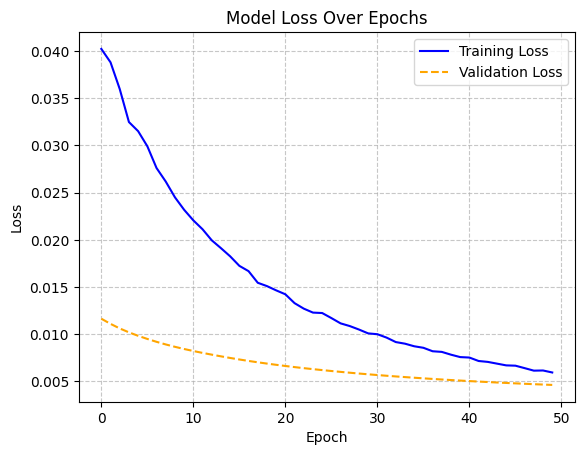

In [ ]:
from matplotlib import pyplot as plt
def plot_hist(hist):
    # Create figure & 1 axis
    fig, ax = plt.subplots()

    # Plot training loss
    ax.plot(hist.history['loss'], label='Training Loss', color='blue', linestyle='-')

    # Plot validation loss
    ax.plot(hist.history['val_loss'], label='Validation Loss', color='orange', linestyle='--')

    # Set plot title and labels
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    plt.legend(loc='upper right')

    # Show the plot
    plt.show()

# Assuming 'hist' is the history object from model.fit
plot_hist(hist)

In [ ]:
# Predict new Matrix Interactions, set score zero on articles customer haven't purchased
new_matrix = model.predict(X) * (X[0] == 0)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df  = pd.DataFrame(new_matrix,
                                            columns = customer_items_matrix_df_train.columns,
                                            index   = customer_items_matrix_df_train.index)
new_customer_items_matrix_df.head()

article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
08ef984221fd7b8d9d903c991eec3cda5a3af7a82882c82dc9030c4d536a137c,-0.032534,-0.025570,0.023266,0.017579,0.013207,-0.003645,-0.006342,0.032467,0.002079,-0.010794,...,-0.006801,0.037494,-0.005530,-0.000040,0.027973,0.004079,0.010197,0.028223,0.000177,-0.006301
029ceb992cb63df03c109790046e3fdebfce0b63c968823dd461b7f18ecc6b30,0.002352,-0.006170,0.047876,0.030651,-0.019259,0.006287,-0.020888,0.055971,0.001496,0.049555,...,-0.014376,0.026812,0.015700,-0.002302,0.002280,0.006046,0.008063,-0.002664,-0.007146,0.021314
02334389c86031bc841c43b000006162d3bdadd0a88acd650eaebdb3f1beb9c5,-0.012787,-0.006963,0.003526,0.022489,0.004098,-0.012425,0.009543,-0.024727,-0.012129,0.012821,...,-0.017982,0.000341,0.001968,-0.024139,0.002418,-0.006622,-0.000182,0.014665,0.010456,0.006041
07a420b50098f077205a5d56780dd0d946034362b00198f7e5b5114876c29151,0.000114,0.029451,0.013417,-0.012001,0.009955,0.032385,0.008670,0.020946,0.014165,-0.019504,...,-0.018168,0.015576,0.000604,0.031912,-0.004862,-0.004761,-0.027185,0.022404,-0.010989,0.022204
082fa45b5ed4935d58b92bc9044e5a249772a740d9d2ccae83e9895b5dcbe453,-0.003074,-0.004691,-0.000983,0.008069,0.010748,0.002345,0.021817,-0.019153,-0.007085,0.008023,...,-0.005527,-0.016151,0.004844,0.000184,0.035709,-0.005456,0.009197,-0.014547,0.023510,-0.000652


In [ ]:
def recommender_for_customer(customer_id, interact_matrix, df_content, topn = 10):
    '''
    Recommender Articles for Customers
    '''
    pred_scores = interact_matrix.loc[customer_id].values

    df_scores   = pd.DataFrame({'article_id': list(customer_items_matrix_df.columns),
                               'score': pred_scores})

    df_rec      = df_scores.set_index('article_id')\
                    .join(df_content.set_index('article_id'))\
                    .sort_values('score', ascending=False)\
                    .head(topn)[['score', 'prod_name']]

    return df_rec[df_rec.score > 0]

In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/HM-Recommender-System-App/Data/articles.csv")

In [ ]:
cust_id = '02e0910945216963833093e0e56712e7362b01b7ef0cd4b375f857542b085020'
# EXAMPLE: ARTICLE previously purchased by the customer
hist_customer=recommender_for_customer(customer_id = cust_id, interact_matrix = customer_items_matrix_df,
                                  df_content = articles)

prev_items = hist_customer.index.values

In [ ]:
# Articles Previously purchased by customers
articles[articles['article_id'].isin(prev_items)][['prod_name', 'product_type_name', 'product_group_name']]

,prod_name,product_type_name,product_group_name
1095,Karenina Jacket,Jacket,Garment Upper body
12928,Spencer Shirt Sweater,Sweater,Garment Upper body
16847,Taylor Fancy Denim,Trousers,Garment Lower body
32670,CSP Coronado lace sweater,Sweater,Garment Upper body
34110,Bali top BIG,Bikini top,Swimwear
39776,MC Eleven top,Top,Garment Upper body
44106,GABBY KNITTED TUBE,Scarf,Accessories
44658,Linni tee,T-shirt,Garment Upper body
45813,Savannah shopper (1),Bag,Accessories


In [ ]:
# Recommended Articles
hist_customer_rec = recommender_for_customer(customer_id=cust_id,
                         interact_matrix = new_customer_items_matrix_df,
                         df_content = articles)
next_items = hist_customer_rec.index.values


In [ ]:
# Recommended articles
articles[articles['article_id'].isin(next_items)][['prod_name', 'product_type_name', 'product_group_name']]

,prod_name,product_type_name,product_group_name
6972,Savage parka,Jacket,Garment Upper body
26140,Vanilla Ice Brief,Swimwear bottom,Swimwear
26641,Barbados W,Dress,Garment Full body
28241,W Amanda,Skirt,Garment Lower body
28337,Drake sporty sweatpants TP,Trousers,Garment Lower body
29982,James Biker,Jacket,Garment Upper body
36302,Hanako WL,Sneakers,Shoes
37274,ED Johnny top,Top,Garment Upper body
44218,Micke crew color block,Sweater,Garment Upper body
45569,Doris L/S,Top,Garment Upper body


Example 2

In [ ]:
X_test = customer_items_matrix_df_test.values
# Predict new Matrix Interactions, set score zero on articles customer haven't purchased
new_matrix_test = model.predict(X_test) * (X_test[0] == 0)

# converting the reconstructed matrix back to a Pandas dataframe
new_customer_items_matrix_df_test  = pd.DataFrame(new_matrix_test,
                                            columns = customer_items_matrix_df_test.columns,
                                            index   = customer_items_matrix_df_test.index)
new_customer_items_matrix_df_test.head()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


article_id,108775015,110065001,111593001,153115039,156231001,156231002,160442007,176550020,179208001,179950001,...,713997001,714373001,714417001,714425001,716519001,719017002,720384002,725253001,728162001,728162002
customer_id,,,,,,,,,,,,,,,,,,,,,
01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4,0.092958,-0.066525,-0.033969,-0.054748,-0.035304,0.051721,-0.015117,0.024977,-0.016708,-0.007957,...,-0.050693,-0.057574,-0.062208,0.021108,0.038596,0.006112,-0.000643,0.079611,-0.061580,-0.055496
077641946a092614f6da9c0ab14ce034907c4e168bd73ae680f423a11c20bf71,0.129670,0.018424,0.079960,-0.026884,-0.118534,0.089376,0.104650,-0.049792,-0.057419,-0.103164,...,0.118971,-0.132692,-0.062696,-0.069427,-0.063025,-0.075634,-0.266421,0.089039,-0.193870,-0.033148
0a3d969f9d990f20c038ad8a1b3e4a172e862717f3c992b4d6a8a7cc9f43ad0f,-0.016132,-0.010603,0.003425,-0.036412,-0.008589,-0.044123,-0.004311,-0.005485,-0.048954,-0.048338,...,0.049328,0.008206,-0.068989,-0.018941,-0.017097,0.021987,0.038018,0.002539,0.032312,-0.027804
015e83393e4fc3b071ba6fc5f174bf3bf9813c88dcaf3e61e34c6525984d0ed1,0.018096,0.043588,-0.037792,0.068723,0.011151,0.000335,-0.022555,0.000872,-0.009612,-0.062337,...,0.006822,0.008053,0.009173,0.003388,0.030567,-0.003798,-0.000808,-0.031445,-0.024269,-0.004927
03176a1445de4730c2ca5d514c3ce2182972ad42dfae65f4549778a2e918a7bd,-0.032521,-0.106510,0.023752,-0.097360,-0.122142,-0.095554,-0.033634,0.061039,-0.021990,0.032867,...,-0.006880,0.012029,0.016684,-0.046204,-0.003750,-0.061178,0.057197,0.025102,0.000464,0.024654


In [ ]:
cust_id = '01f597f5eba83f9709eceb5a70a99f3a4009a6e827bf7293afa4211030a29fa4'
hist_customer_test=recommender_for_customer(customer_id=cust_id,
                         interact_matrix=customer_items_matrix_df_test,
                         df_content=articles)
prev_items = hist_customer_test.index.values

In [ ]:
articles[articles['article_id'].isin(prev_items)][['prod_name', 'product_type_name', 'product_group_name']]

,prod_name,product_type_name,product_group_name
3500,Woody (1),Hoodie,Garment Upper body
29610,Portman,Dress,Garment Full body
38438,Bellini price CF,Sweater,Garment Upper body
42854,Kamikaze CF,Sweater,Garment Upper body
43419,Memphis Dress,Dress,Garment Full body


In [ ]:
# Recommended items
hist_customer_rec_test=recommender_for_customer(customer_id=cust_id,
                         interact_matrix=new_customer_items_matrix_df_test,
                         df_content=articles)

next_items = hist_customer_rec_test.index.values

In [ ]:
articles[articles['article_id'].isin(next_items)][['prod_name', 'product_type_name', 'product_group_name']]

,prod_name,product_type_name,product_group_name
2344,ELIAS basic V-neck BB 2-p,T-shirt,Garment Upper body
22991,Liza thong (Mynta) 3p,Underwear bottom,Underwear
25616,Slim cargo,Trousers,Garment Lower body
25870,Ambrosia,Top,Garment Upper body
31688,Zebra sweater TOP PRODUCT,Sweater,Garment Upper body
33205,Techno,Sweater,Garment Upper body
33282,TOBAGO one piece,Top,Garment Upper body
33540,Capri blazer,Blazer,Garment Upper body
41277,Ledger set,T-shirt,Garment Upper body
46303,W YODA KNIT OL OFFER,Sweater,Garment Upper body


# Handling Sparsity

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_squared_error

transactions = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/transactions_train.csv')
transactions = transactions.head(5000)
transactions = transactions.groupby(['customer_id', 'article_id'])['price'].sum().reset_index()

# User Interaction Matrix
interaction_matrix = transactions.pivot(index='customer_id', columns='article_id', values='price').fillna(0)

# Convert the dense matrix to a sparse matrix representation
sparse_matrix = csr_matrix(interaction_matrix.values)

In [7]:
sparse_matrix.shape

(1484, 3064)

In [8]:
# Apply TruncatedSVD (Matrix Factorization) to reduce dimensionality
svd = TruncatedSVD(n_components=50, random_state=42)
user_features = svd.fit_transform(sparse_matrix)

# Reconstruct the dense matrix from the reduced features
reconstructed_matrix = svd.inverse_transform(user_features)

# Calculate RMSE to evaluate reconstruction quality
rmse = np.sqrt(mean_squared_error(sparse_matrix.toarray(), reconstructed_matrix))
print(f"RMSE: {rmse}")

RMSE: 0.0010429475175112964


# Handling Cold Start

### Content-Based Filtering for New Items

For new items, we can use content-based filtering by leveraging item metadata from articles.csv. We can calculate similarity between items based on their features (e.g., product type, color group) and recommend similar items to users who have interacted with similar products.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
pd.set_option('display.max_columns', None)

articles = pd.read_csv('/content/drive/MyDrive/HM-Recommender-System-App/Data/articles.csv')

articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [22]:
articles.sample(3)[articles.columns[:-1]]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name
3219,451243005,451243,Rufus 5-pkt trousers,272,Trousers,Garment Lower body,1010016,Solid,93,Dark Green,4,Dark,19,Green,8756,Young Boy Trouser,I,Children Sizes 134-170,4,Baby/Children,47,Young Boy,1009,Trousers
26593,617480001,617480,Sangria dress,265,Dress,Garment Full body,1010001,All over pattern,21,Light Yellow,3,Light,8,Yellow,1343,Projects Dresses,D,Divided,2,Divided,50,Divided Projects,1013,Dresses Ladies
97861,876193002,876193,Molly sandal SG,91,Sandals,Shoes,1010016,Solid,51,Light Pink,3,Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes


In [25]:
# Select relevant features for content-based filtering
features = ['product_type_no', 'colour_group_code', 'department_no', 'garment_group_no', 'section_no']
item_features = articles[features].values

# Simulate new item features (for cold start)
new_item_features = np.array([[272, 93, 8756, 1009, 47]])
# new_item_features = np.array([[265, 21, 1343, 1013, 50]])
# new_item_features = np.array([[91, 51, 4311, 1020, 42]])

# Calculate similarity between new item and existing items using cosine similarity
similarity_scores = cosine_similarity(new_item_features, item_features)

# Recommend top 5 most similar articles based on similarity scores
top_recommendations_indices = np.argsort(similarity_scores[0])[-5:][::-1]

recommended_articles = articles.iloc[top_recommendations_indices]
recommended_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
78799,795774001,795774,Eva poolslide SG,91,Sandals,Shoes,1010002,Application/3D,51,Light Pink,1,Dusty Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes,"Pool shoes with a padded, rainbow-coloured fab..."
38221,656952001,656952,Ottoline SG,91,Sandals,Shoes,1010016,Solid,51,Light Pink,3,Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes,Imitation leather sandals with adjustable foot...
49563,694915004,694915,Anna price sandal SG,91,Sandals,Shoes,1010016,Solid,51,Light Pink,1,Dusty Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes,Sandals with crossover straps at the front and...
81844,806401001,806401,Bente sandal SG,91,Sandals,Shoes,1010009,Glittering/Metallic,51,Light Pink,3,Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes,Sandals in imitation leather. Adjustable ankle...
81847,806401004,806401,Bente sandal SG,91,Sandals,Shoes,1010016,Solid,51,Light Pink,3,Light,4,Pink,4311,Kids Girl Shoes,J,"Children Accessories, Swimwear",4,Baby/Children,42,Kids & Baby Shoes,1020,Shoes,Sandals in imitation leather. Adjustable ankle...


### Preference Elicitation for New Users
For new users, we can simulate preference elicitation by asking them to rate a few popular or representative items during onboarding. Based on their responses, we can recommend similar items using a content-based approach.

In [32]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Simulating preference elicitation through a simple survey for a new user
def preference_survey():
    return np.random.randint(1, 6, 5) # Simulate ratings for 5 random items (scale 1-5)

initial_preferences = preference_survey()
print("Initial Preferences:", initial_preferences)

new_user_preferences = np.random.rand(5)  # Simulated preferences for each feature
print("New User Preferences:", new_user_preferences)

# Calculate similarity of new user preferences with item features using cosine similarity
similarity_scores = cosine_similarity(new_user_preferences.reshape(1, -1), item_features)

# Recommend top 5 articles based on similarity scores for the new user
top_recommendations_indices = np.argsort(similarity_scores[0])[-5:][::-1]
recommended_articles_for_new_user = articles.iloc[top_recommendations_indices]
recommended_articles_for_new_user

Initial Preferences: [5 4 2 2 2]
New User Preferences: [0.15787275 0.7472105  0.01046929 0.39741981 0.38371352]


,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
58799,721266002,721266,Carla parka,308,Hoodie,Garment Upper body,1010016,Solid,93,Dark Green,4,Dark,19,Green,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,"Short, pile-lined parka in a cotton weave with..."
77747,791033006,791033,Disa jacket,308,Hoodie,Garment Upper body,1010016,Solid,91,Light Green,1,Dusty Light,19,Green,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,"Short, boxy jacket in woven fabric with a line..."
51741,699617004,699617,Stark wool coat,263,Coat,Garment Upper body,1010016,Solid,93,Dark Green,4,Dark,19,Green,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,"Short, double-breasted coat in a soft weave wi..."
13026,556015005,556015,Dragon Fluid Parka,263,Coat,Garment Upper body,1010016,Solid,93,Dark Green,4,Dark,20,Khaki green,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,"Parka in a woven modal blend with a soft, brus..."
11387,547453001,547453,Tentacool Parka,262,Jacket,Garment Upper body,1010002,Application/3D,93,Dark Green,4,Dark,19,Green,1244,Outdoor/Blazers,D,Divided,2,Divided,53,Divided Collection,1007,Outdoor,Jacket in a cotton weave with embroidered moti...


# Evaluation

In [49]:
import numpy as np

# Function to calculate precision at K
def precision_at_k(recommended_items, relevant_items, k):
    top_k_recommendations = recommended_items[:k]
    num_relevant_at_k = len(set(top_k_recommendations) & set(relevant_items))
    return num_relevant_at_k / k

# Function to calculate recall at K
def recall_at_k(recommended_items, relevant_items, k):
    top_k_recommendations = recommended_items[:k]
    num_relevant_at_k = len(set(top_k_recommendations) & set(relevant_items))
    return num_relevant_at_k / len(relevant_items)

# Function to calculate F1-score at K
def f1_score_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Evaluate collaborative filtering model
def evaluate(recommended_items, relevant_items, k):
    precision = precision_at_k(recommended_items, relevant_items, k)
    recall = recall_at_k(recommended_items, relevant_items, k)
    f1 = f1_score_at_k(precision, recall)
    return precision, recall, f1

In [50]:
# Example usage for collaborative filtering model
recommended_items = recommended_articles['article_id']
relevant_items = [795774001, 694915004, 806401001, 806401004]
k = 5

# Evaluate collaborative filtering
precision_cf, recall_cf, f1_cf = evaluate(recommended_items, relevant_items, k)
print(f"Precision@{k}: {precision_cf:.2f}, Recall@{k}: {recall_cf:.2f}, F1-score@{k}: {f1_cf:.2f}")

Precision@5: 0.80, Recall@5: 1.00, F1-score@5: 0.89


In [52]:
# Example usage for collaborative filtering model
recommended_items = recommended_articles_for_new_user['article_id']
relevant_items = [721266002, 556015005, 547453001] # Ground Truth
k = 5

# Evaluate collaborative filtering
precision_cf, recall_cf, f1_cf = evaluate(recommended_items, relevant_items, k)
print(f"Precision@{k}: {precision_cf:.2f}, Recall@{k}: {recall_cf:.2f}, F1-score@{k}: {f1_cf:.2f}")

Precision@5: 0.60, Recall@5: 1.00, F1-score@5: 0.75
